## Import libraries and functions

In [ ]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib.patches import Patch

sns.set()
sys.path.append('../Scripts')

from analysis import *

## Load data

In [5]:
u6_regression = ['../Data/3. Testing datasets/1. Regression (U6)/1. HEL (Labuhn) predictions.csv',
                 '../Data/3. Testing datasets/1. Regression (U6)/2. A375 (Shalem) predictions.csv',
                 '../Data/3. Testing datasets/1. Regression (U6)/3. mESC (Koike-Yusa) predictions.csv',
                 '../Data/3. Testing datasets/1. Regression (U6)/4. HEK293T (Kim) predictions.csv']

t7_regression = ['../Data/3. Testing datasets/2. Regression (T7)/1. Zebrafish (Shkumatava) predictions.csv',
                 '../Data/3. Testing datasets/2. Regression (T7)/2. Zebrafish (Gagnon) predictions.csv',
                 '../Data/3. Testing datasets/2. Regression (T7)/3. Zebrafish (Varshney) predictions.csv',
                 '../Data/3. Testing datasets/2. Regression (T7)/4. Mouse (Teboul) predictions.csv']

classification = ['../Data/3. Testing datasets/3. Classification/1. mESC (Koike-Yusa) labeled predictions.csv',
                  '../Data/3. Testing datasets/3. Classification/2. HL60-KBM7 (Wang) labeled predictions.csv',
                  '../Data/3. Testing datasets/3. Classification/3. HEK293T (Chari) labeled predictions.csv',
                  '../Data/3. Testing datasets/3. Classification/4. sgDesigner (Hiranniramol) labeled predictions.csv']

## Evaluate

### Regression

**Choose between Spearman, nDCG, or R-Precision**

#### Spearman

In [6]:
datasets = []
results = defaultdict(list)

ds = pd.read_csv(u6_regression[0])
models = ds.columns[2:10].to_list()
models.append('CRISPRedict')

for i in range(0, 4):
    datasets.append(u6_regression[i].split()[-2].split('(')[1].split(')')[0])

for i in range(0, 4):
    datasets.append(t7_regression[i].split()[-2].split('(')[1].split(')')[0])

In [7]:
for index, data in enumerate(u6_regression):
    result = pd.read_csv(data)
    datasets[index] = datasets[index] + '\n(n = ' + str(len(result)) + ')'

    for i in range(3, 12):
        results[models[i-3]].append(spearman_ds(result, 2, i))

for index, data in enumerate(t7_regression):
    result = pd.read_csv(data)
    datasets[index+4] = datasets[index+4] + '\n(n = ' + str(len(result)) + ')'

    for i in range(3, 12):
        results[models[i-3]].append(spearman_ds(result, 2, i))

Collect results

In [8]:
all_results = pd.DataFrame(index=datasets, columns=models)

for k, v in results.items():
    all_results[k] = v

# Save results
all_results.to_csv('Spearman Results.csv')

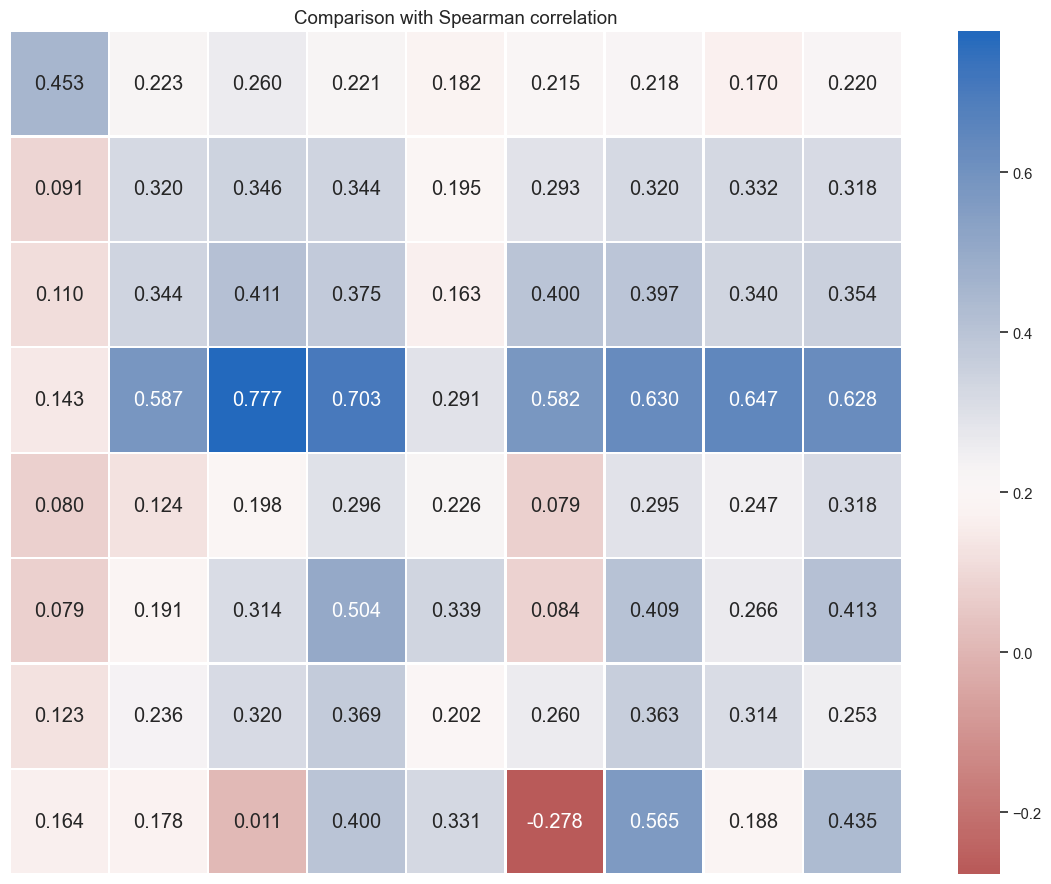

In [9]:
my_dpi=96
plt.figure(figsize=(1150/my_dpi, 900/my_dpi), dpi=my_dpi)
plt.title('Comparison with Spearman correlation', fontsize=14)

sns.heatmap(all_results, annot=True, cmap='vlag_r', linewidths=1, fmt='.3f', center=0.2, annot_kws={"fontsize":15})

plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.savefig('CRISPRedict Spearman.png')
plt.show()

#### nDCG

In [10]:
datasets = []
results = defaultdict(list)

ds = pd.read_csv(u6_regression[0])
models = ds.columns[2:10].to_list()
models.append('CRISPRedict')

for i in range(0, 4):
    datasets.append(u6_regression[i].split()[-2].split('(')[1].split(')')[0])

for i in range(0, 4):
    datasets.append(t7_regression[i].split()[-2].split('(')[1].split(')')[0])

In [11]:
for index, data in enumerate(u6_regression):
    result = pd.read_csv(data)
    datasets[index] = datasets[index] + '\n(k = ' + str(math.ceil(len(result)/5)) + ')'

    for i in range(3, 12):
        results[models[i-3]].append(ndcg_at_k(result, math.ceil(len(result)/5), 2, i))

for index, data in enumerate(t7_regression):
    result = pd.read_csv(data)
    datasets[index+4] = datasets[index+4] + '\n(k = ' + str(math.ceil(len(result)/5)) + ')'

    for i in range(3, 12):
        results[models[i-3]].append(ndcg_at_k(result, math.ceil(len(result)/5), 2, i))

Collect results

In [12]:
all_results = pd.DataFrame(index=datasets, columns=models)

for k, v in results.items():
    all_results[k] = v

# Save results
all_results.to_csv('nDCG Results.csv')

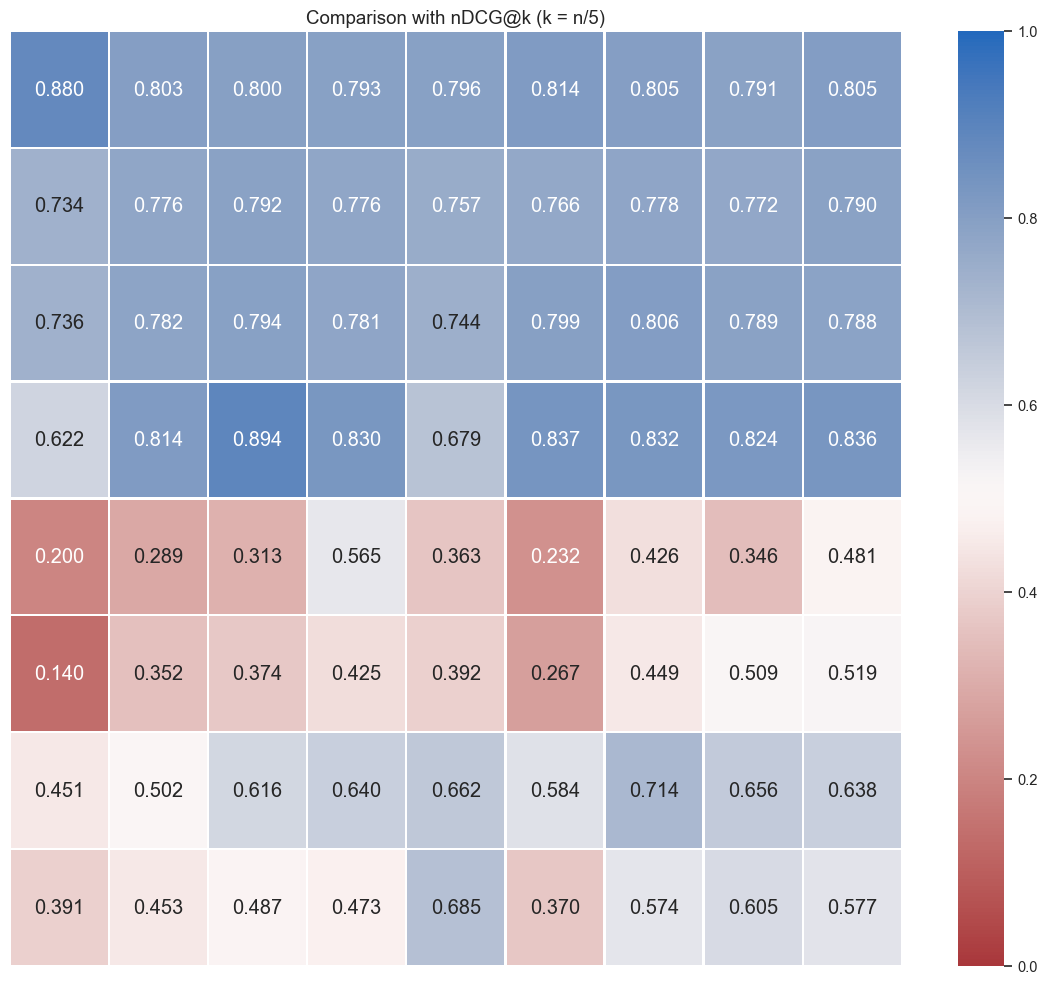

In [13]:
my_dpi=96
plt.figure(figsize=(1150/my_dpi, 1000/my_dpi), dpi=my_dpi)
plt.title('Comparison with nDCG@k (k = n/5)', fontsize=14)

sns.heatmap(all_results, annot=True, cmap='vlag_r', linewidths=1, fmt='.3f', vmin=0, vmax=1, annot_kws={"fontsize":15})

plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.savefig('CRISPRedict nDCG.png')
plt.show()

#### R-Precision

In [14]:
datasets = []
results = defaultdict(list)

ds = pd.read_csv(u6_regression[0])
models = ds.columns[2:10].to_list()
models.append('CRISPRedict')

for i in range(0, 4):
    datasets.append(u6_regression[i].split()[-2].split('(')[1].split(')')[0])

for i in range(0, 4):
    datasets.append(t7_regression[i].split()[-2].split('(')[1].split(')')[0])

In [15]:
for index, data in enumerate(u6_regression):
    result = pd.read_csv(data)
    datasets[index] = datasets[index] + '\n(R = ' + str(r_precision(result, 2, 3)[1]) + ')'

    for i in range(3, 12):
        results[models[i-3]].append(r_precision(result, 2, i)[0])

for index, data in enumerate(t7_regression):
    result = pd.read_csv(data)
    datasets[index+4] = datasets[index+4] + '\n(R = ' + str(r_precision(result, 2, 3)[1]) + ')'

    for i in range(3, 12):
        results[models[i-3]].append(r_precision(result, 2, i)[0])

Collect results

In [16]:
all_results = pd.DataFrame(index=datasets, columns=models)

for k, v in results.items():
    all_results[k] = v

# Save results
all_results.to_csv('R-Precision Results.csv')

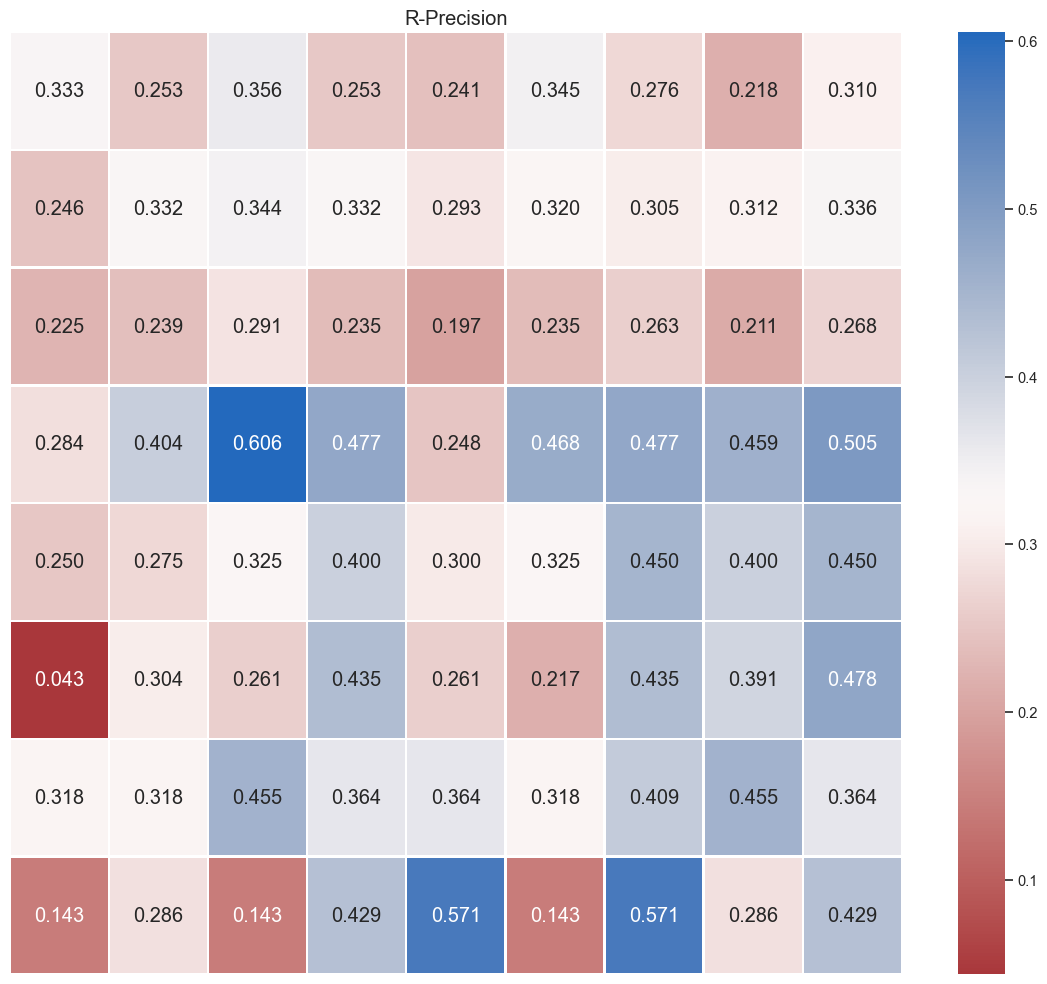

In [17]:
my_dpi=96
plt.figure(figsize=(1150/my_dpi, 1000/my_dpi), dpi=my_dpi)
plt.title('R-Precision', fontsize=15)

sns.heatmap(all_results, annot=True, cmap='vlag_r', linewidths=1, fmt='.3f', annot_kws={"fontsize":15})

plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.savefig('CRISPRedict R-Precision.png')
plt.show()

### Classification

**Choose between R-Precision, AUC, or ROC Curve**

#### R-Precision

In [18]:
datasets = []
results = defaultdict(list)

ds = pd.read_csv(classification[0])
models = ds.columns[3:11].to_list()
models.append('CRISPRedict')

for i in range(0, 4):
    datasets.append(classification[i].split()[-3].split('(')[1].split(')')[0])

In [19]:
for index, data in enumerate(classification):
    result = pd.read_csv(data)
    datasets[index] = datasets[index] + '\n(R = ' + str(r_precision(result, 2, 4, label_col=3, labeled=True)[1]) + ')'

    for i in range(4, 12):
        results[models[i-4]].append(r_precision(result, 2, i, label_col=3, labeled=True)[0])

    results[models[8]].append(r_precision(result, 2, 13, label_col=3, labeled=True)[0])

Collect results

In [20]:
all_results = pd.DataFrame(index=datasets, columns=models)

for k, v in results.items():
    all_results[k] = v

all_results.head()

,DeepCRISPR,DeepCas9,DeepSpCas9,DeepHF,CRISPRLearner,Azimuth 2.0,TSAM,sgDesigner,CRISPRedict
Koike-Yusa\n(R = 830),0.814458,0.877108,0.889157,0.900000,0.824096,0.877108,0.877108,0.881928,0.874699
Wang\n(R = 1402),0.852354,0.867332,0.872325,0.884451,0.962910,0.824536,0.843081,0.855207,0.837375
Chari\n(R = 133),0.556391,0.812030,0.774436,0.744361,1.000000,0.714286,0.714286,0.759398,0.714286
Hiranniramol\n(R = 746),0.644772,0.833780,0.888740,0.859249,0.711796,0.812332,0.847185,1.000000,0.835121


In [21]:
all_results2 = all_results.copy()
all_results2.loc['Wang\n(R = 1402)', ['DeepCRISPR', 'DeepCas9', 'CRISPRLearner']] = np.nan
all_results2.loc['Chari\n(R = 133)', ['DeepCas9', 'CRISPRLearner']] = np.nan
all_results2.loc['Hiranniramol\n(R = 746)', 'sgDesigner'] = np.nan

# Save results
all_results2.to_csv('R-Precision (Labeled-NaN) Results.csv')

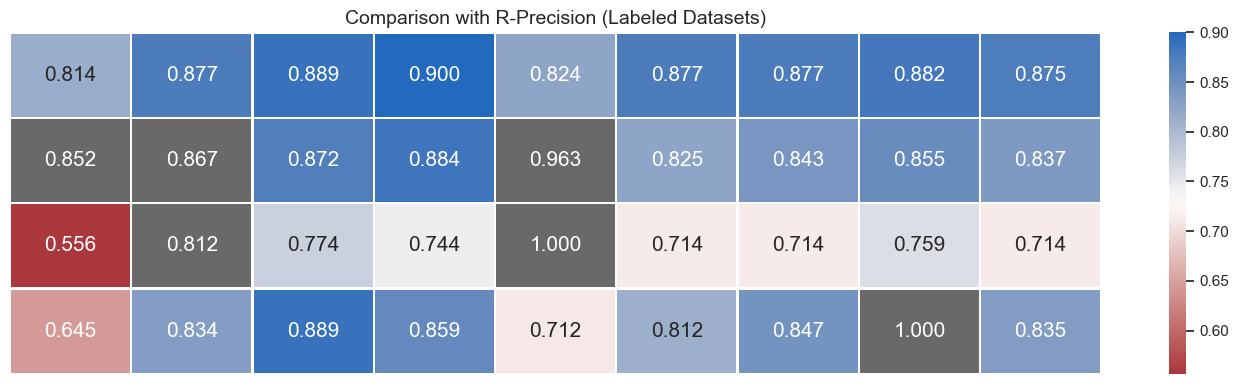

In [22]:
mask = np.array(all_results2 > 0)

sel_cm = cm.get_cmap('vlag_r')
sel_cm.set_bad("dimgrey")

plt.figure(figsize=(14, 4), dpi=100)

plt.title('Comparison with R-Precision (Labeled Datasets)', fontsize=14)

ax = sns.heatmap(all_results, annot=True, mask=mask, cmap=sel_cm, linewidths=1, fmt='.3f', annot_kws={"fontsize":15}, cbar=False)

for text in ax.texts:
    if text.get_text() == '0.867':
        text.set_color('white')

sns.heatmap(all_results2, annot=True, cmap=sel_cm, linewidths=1, fmt='.3f', annot_kws={"fontsize":15})

plt.xticks([])
plt.yticks([])

plt.tight_layout()

plt.savefig('CRISPRedict R-Precision (class).png')

plt.show()

#### AUC

In [23]:
datasets = []
results = defaultdict(list)

ds = pd.read_csv(classification[0])
models = ds.columns[3:11].to_list()
models.append('CRISPRedict')

for i in range(0, 4):
    datasets.append(classification[i].split()[-3].split('(')[1].split(')')[0])

In [24]:
for index, data in enumerate(classification):
    result = pd.read_csv(data)
    datasets[index] = datasets[index] + '\n(n = ' + str(len(result)) + ')'

    for i in range(4, 12):
        results[models[i-4]].append(auc_ds(result, 3, i))

    results[models[8]].append(auc_ds(result, 3, 13))

In [25]:
all_results = pd.DataFrame(index=datasets, columns=models)

for k, v in results.items():
    all_results[k] = v

all_results.head()

,DeepCRISPR,DeepCas9,DeepSpCas9,DeepHF,CRISPRLearner,Azimuth 2.0,TSAM,sgDesigner,CRISPRedict
Koike-Yusa\n(n = 1064),0.616100,0.808552,0.830924,0.843574,0.648368,0.799186,0.802080,0.823406,0.794630
Wang\n(n = 2077),0.857991,0.877989,0.871758,0.901115,0.956584,0.813495,0.836794,0.850302,0.834761
Chari\n(n = 279),0.612524,0.898805,0.873262,0.849006,1.000000,0.809352,0.818982,0.851530,0.833145
Hiranniramol\n(n = 1309),0.605872,0.894173,0.938554,0.918433,0.714799,0.875123,0.907995,1.000000,0.894102


In [26]:
all_results2 = all_results.copy()
all_results2.loc['Wang\n(n = 2077)', ['DeepCRISPR', 'DeepCas9', 'CRISPRLearner']] = np.nan
all_results2.loc['Chari\n(n = 279)', ['DeepCas9', 'CRISPRLearner']] = np.nan
all_results2.loc['Hiranniramol\n(n = 1309)', 'sgDesigner'] = np.nan

# Save results
all_results2.to_csv('AUC (Labeled-NaN) Results.csv')

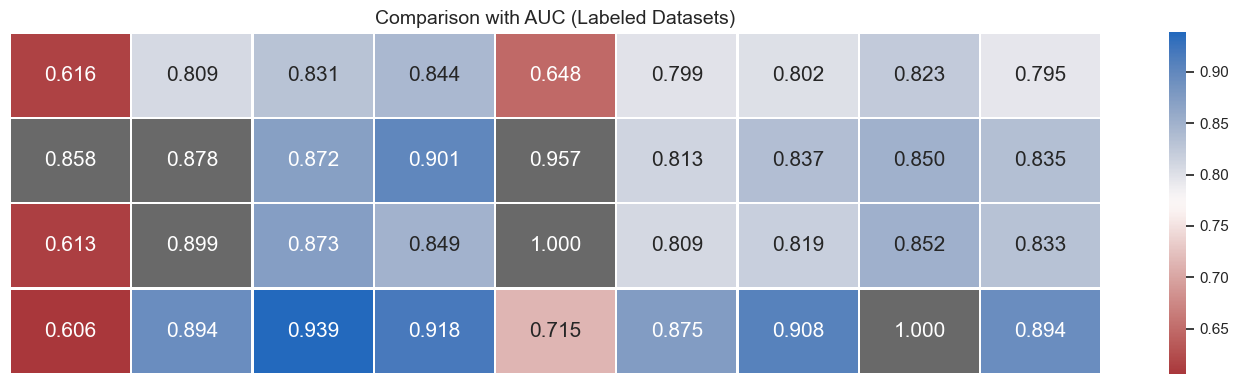

In [27]:
mask = np.array(all_results2 > 0)

sel_cm = cm.get_cmap('vlag_r')
sel_cm.set_bad("dimgrey")

plt.figure(figsize=(14, 4), dpi=100)

plt.title('Comparison with AUC (Labeled Datasets)', fontsize=14)

ax = sns.heatmap(all_results, annot=True, mask=mask, cmap=sel_cm, linewidths=1, fmt='.3f', annot_kws={"fontsize":15}, cbar=False)

for text in ax.texts:
    if text.get_text() == '0.899' or text.get_text() == '0.957':
        text.set_color('white')

sns.heatmap(all_results2, annot=True, cmap=sel_cm, linewidths=1, fmt='.3f', annot_kws={"fontsize":15})

plt.xticks([])
plt.yticks([])

plt.tight_layout()

plt.savefig('CRISPRedict AUC (class).png')

plt.show()

#### ROC Curve

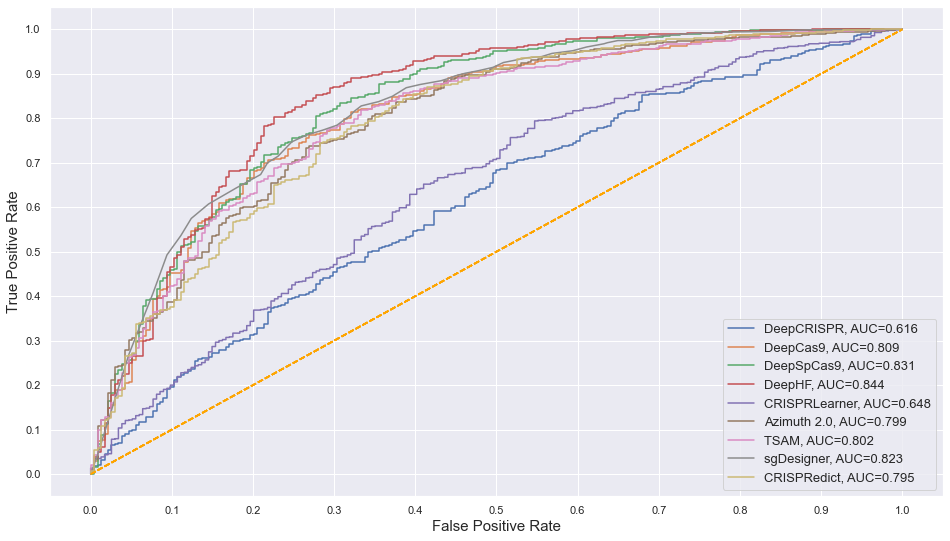

In [28]:
result = pd.read_csv(classification[0])
result = result.rename(columns={'LogReg (U6)': 'CRISPRedict'})

plt.figure(figsize=(16, 9))

for i in range(4, 12):
    roc_curve_ds(result, 3, i)

roc_curve_ds(result, 3, 13)

plt.savefig('1. Koike ROC Curve.png')

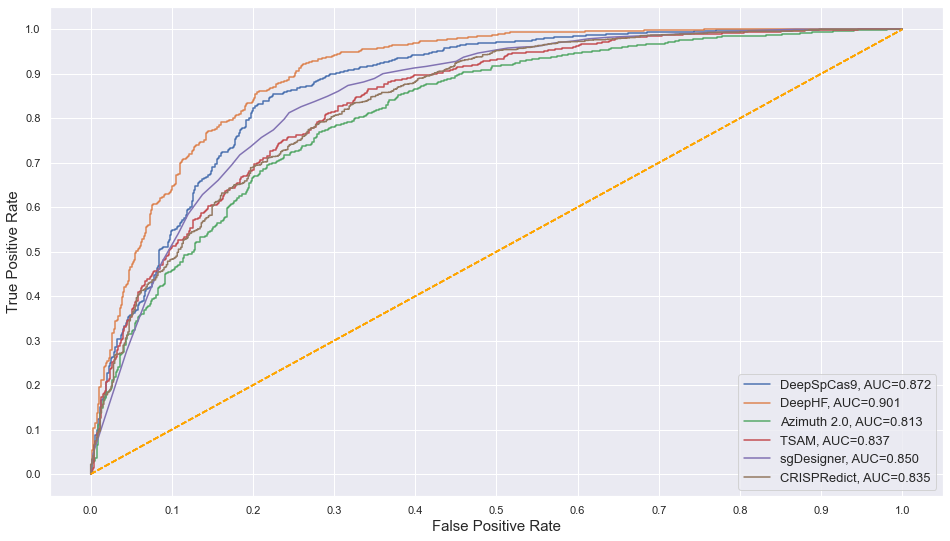

In [29]:
result = pd.read_csv(classification[1])
result = result.rename(columns={'LogReg (U6)': 'CRISPRedict'})

plt.figure(figsize=(16, 9))

for i in range(6, 8):
    roc_curve_ds(result, 3, i)

for i in range(9, 12):
    roc_curve_ds(result, 3, i)

roc_curve_ds(result, 3, 13)

plt.savefig('2. Wang ROC Curve.png')

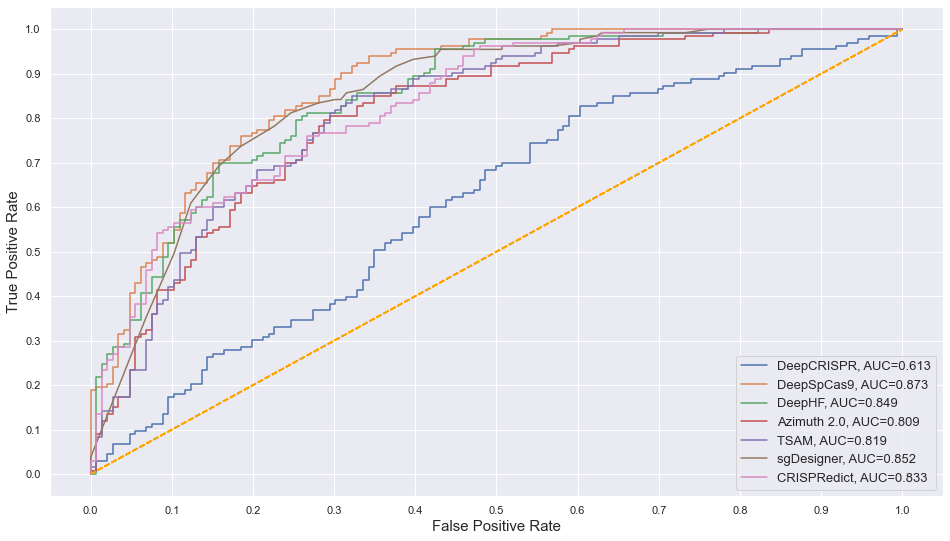

In [30]:
result = pd.read_csv(classification[2])
result = result.rename(columns={'LogReg (U6)': 'CRISPRedict'})

plt.figure(figsize=(16, 9))

roc_curve_ds(result, 3, 4)

for i in range(6, 8):
    roc_curve_ds(result, 3, i)

for i in range(9, 12):
    roc_curve_ds(result, 3, i)

roc_curve_ds(result, 3, 13)

plt.savefig('3. Chari ROC Curve.png')

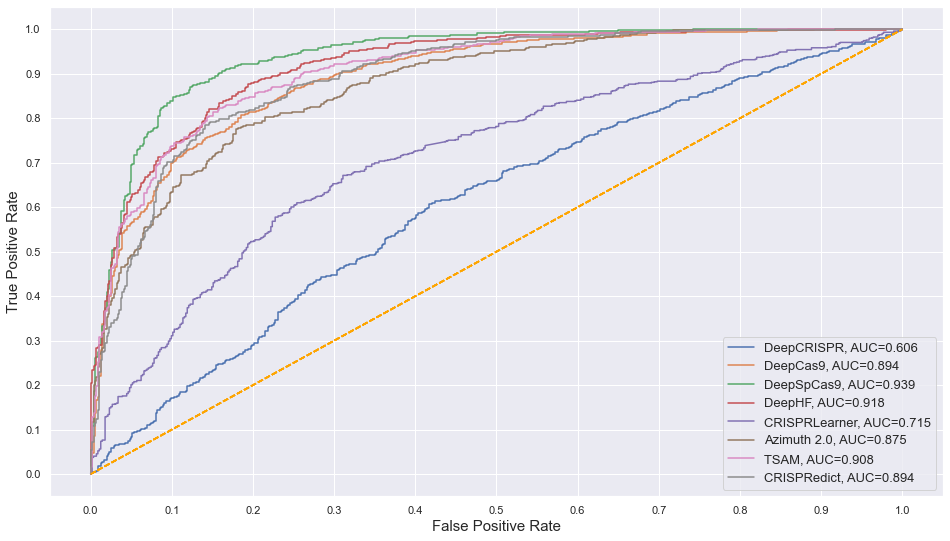

In [31]:
result = pd.read_csv(classification[3])
result = result.rename(columns={'LogReg (U6)': 'CRISPRedict'})

plt.figure(figsize=(16, 9))

for i in range(4, 11):
    roc_curve_ds(result, 3, i)

roc_curve_ds(result, 3, 13)

plt.savefig('4. Hiranniramol ROC Curve.png')

### Statistical Tests

TOST test between CRISPRedict and DeepHF

In [32]:
p_values = tost_test(model_name_1='CRISPRedict', model_name_2='DeepHF')



Spearman correlation between CRISPRedict and DeepHF
----------------------------------------------------
Normality assumption is valid.

  bound    dof    pval
-------  -----  ------
  0.075  7.000   0.036



nDCG@(n/5) between CRISPRedict and DeepHF
------------------------------------------
Normality assumption is valid.

  bound    dof    pval
-------  -----  ------
  0.075  7.000   0.015



R-Precision between CRISPRedict and DeepHF
-------------------------------------------
Normality assumption is valid.

  bound    dof    pval
-------  -----  ------
  0.075  7.000   0.000



R-Precision (Labeled) between CRISPRedict and DeepHF
-----------------------------------------------------
Normality assumption is valid.

  bound    dof    pval
-------  -----  ------
  0.075  3.000   0.002



AUC between CRISPRedict and DeepHF
-----------------------------------
Normality assumption is valid.

  bound    dof    pval
-------  -----  ------
  0.075  3.000   0.026



TOST test between CRISPRedict and TSAM

In [33]:
p_values = tost_test(model_name_1='CRISPRedict', model_name_2='TSAM')



Spearman correlation between CRISPRedict and TSAM
--------------------------------------------------
Normality assumption is valid.

  bound    dof    pval
-------  -----  ------
  0.075  7.000   0.036



nDCG@(n/5) between CRISPRedict and TSAM
----------------------------------------
Normality assumption is valid.

  bound    dof    pval
-------  -----  ------
  0.075  7.000   0.002



R-Precision between CRISPRedict and TSAM
-----------------------------------------
Normality assumption is valid.

  bound    dof    pval
-------  -----  ------
  0.075  7.000   0.008



R-Precision (Labeled) between CRISPRedict and TSAM
---------------------------------------------------
Normality assumption is valid.

  bound    dof    pval
-------  -----  ------
  0.075  3.000   0.000



AUC between CRISPRedict and TSAM
---------------------------------
Normality assumption is valid.

  bound    dof    pval
-------  -----  ------
  0.075  3.000   0.001

